# MidTerm2 - Assignment 1 

**Author: Domenico Profumo 533695**

# Installing hmmlearn Library

In [1]:
!pip3 install hmmlearn

     |████████████████████████████████| 129 kB 4.3 MB/s 


# Import Library and download File

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#HMM
from hmmlearn.hmm import GaussianHMM 

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

--2022-04-10 14:09:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11979363 (11M) [application/x-httpd-php]
Saving to: ‘energydata_complete.csv’

energydata_complete   9%[>                   ]   1.04M  26.4KB/s    in 37s     

2022-04-10 14:25:04 (28.9 KB/s) - Read error at byte 1095168/11979363 (Success). Retrying.

--2022-04-10 14:25:05--  (try: 2)  https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 11979363 (11M), 10884195 (10M) remaining [application/x-httpd-php]
Saving to: ‘energydata_complete.csv’

energydata_complete 100%[+========

## Read files with Pandas and save only the Two Columns of Appliances and Lights in a separate dataset

In [4]:
df = pd.read_csv("energydata_complete.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
#read only data and Appliances with the float64 types
appliances = pd.read_csv('energydata_complete.csv', usecols=[0, 1], dtype = {"Appliances" : "float64"})

#convert the data with the right format YYYY-MM-dd HH-MM-SS
appliances.index = pd.to_datetime(appliances['date'], format='%Y-%m-%d %H:%M:%S')

#set data for index
appliances.set_index('date')

#delete data attribute
del appliances["date"]

#copy the new DataFrame
appl_set=appliances.copy()

#view the new dataset
appl_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Appliances  19735 non-null  float64
dtypes: float64(1)
memory usage: 308.4 KB


In [8]:
#read only data and Lights with the float64 types
lights = pd.read_csv('energydata_complete.csv', usecols=[0, 2], dtype = {"lights" : "float64"})

#convert the data with the right format YYYY-MM-dd HH-MM-SS
lights.index = pd.to_datetime(lights['date'], format='%Y-%m-%d %H:%M:%S')

#set data for index
lights.set_index('date')

#delete data attribute
del lights["date"]

#copy the new DataFrame
lights_set=lights.copy()

#view the new dataset
lights_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lights  19735 non-null  float64
dtypes: float64(1)
memory usage: 308.4 KB


## Summary of the main properties

In [9]:
# STATISTICS

print(lights_set.describe(),"\n\n",appl_set.describe())

             lights
count  19735.000000
mean       3.801875
std        7.935988
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.000000 

          Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000


In [10]:
print(lights_set,"\n\n",appl_set)

                     lights
date                       
2016-01-11 17:00:00    30.0
2016-01-11 17:10:00    30.0
2016-01-11 17:20:00    30.0
2016-01-11 17:30:00    40.0
2016-01-11 17:40:00    40.0
...                     ...
2016-05-27 17:20:00     0.0
2016-05-27 17:30:00     0.0
2016-05-27 17:40:00    10.0
2016-05-27 17:50:00    10.0
2016-05-27 18:00:00    10.0

[19735 rows x 1 columns] 

                      Appliances
date                           
2016-01-11 17:00:00        60.0
2016-01-11 17:10:00        60.0
2016-01-11 17:20:00        50.0
2016-01-11 17:30:00        50.0
2016-01-11 17:40:00        60.0
...                         ...
2016-05-27 17:20:00       100.0
2016-05-27 17:30:00        90.0
2016-05-27 17:40:00       270.0
2016-05-27 17:50:00       420.0
2016-05-27 18:00:00       430.0

[19735 rows x 1 columns]


## Distribution's Graphs

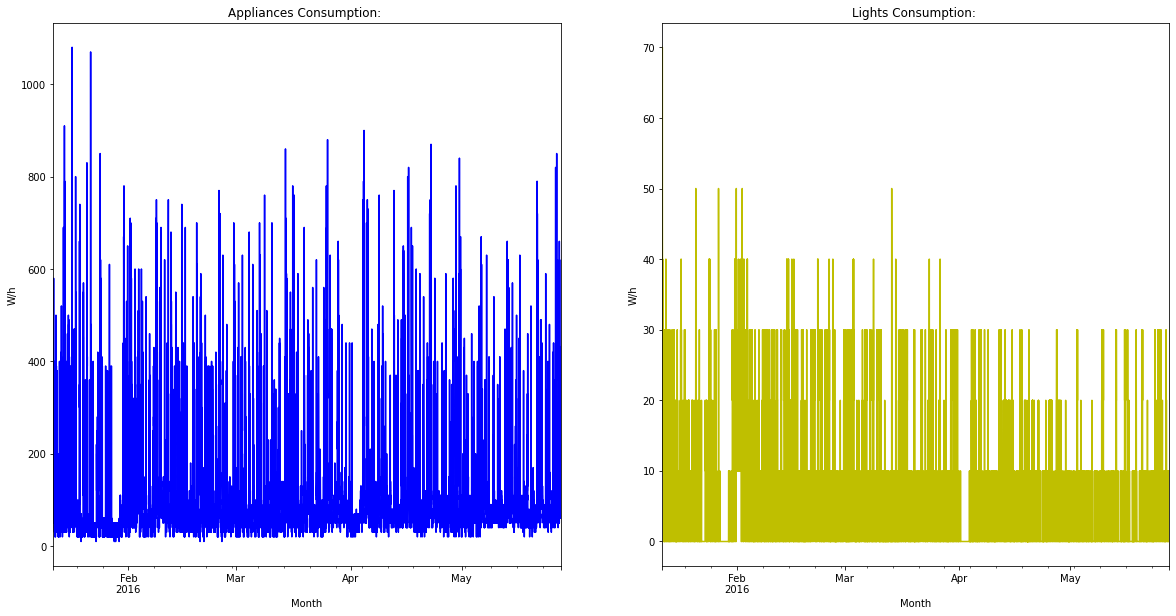

In [11]:
figure, axis = plt.subplots(1, 2, figsize=(20,10))

# Appliances Consumption for Month
appl_set['Appliances'].plot(color='b', ax=axis[0] )
axis[0].title.set_text('Appliances Consumption: ')
axis[0].set_xlabel('Month')
axis[0].set_ylabel('W/h')

# Lights Consumption for Month
lights_set['lights'].plot( c='y' , ax=axis[1]) 
axis[1].title.set_text('Lights Consumption: ')
axis[1].set_xlabel('Month')
axis[1].set_ylabel('W/h')

plt.show()


From a first analysis it is possible to see that there are some regularities and repetitive patterns over time.

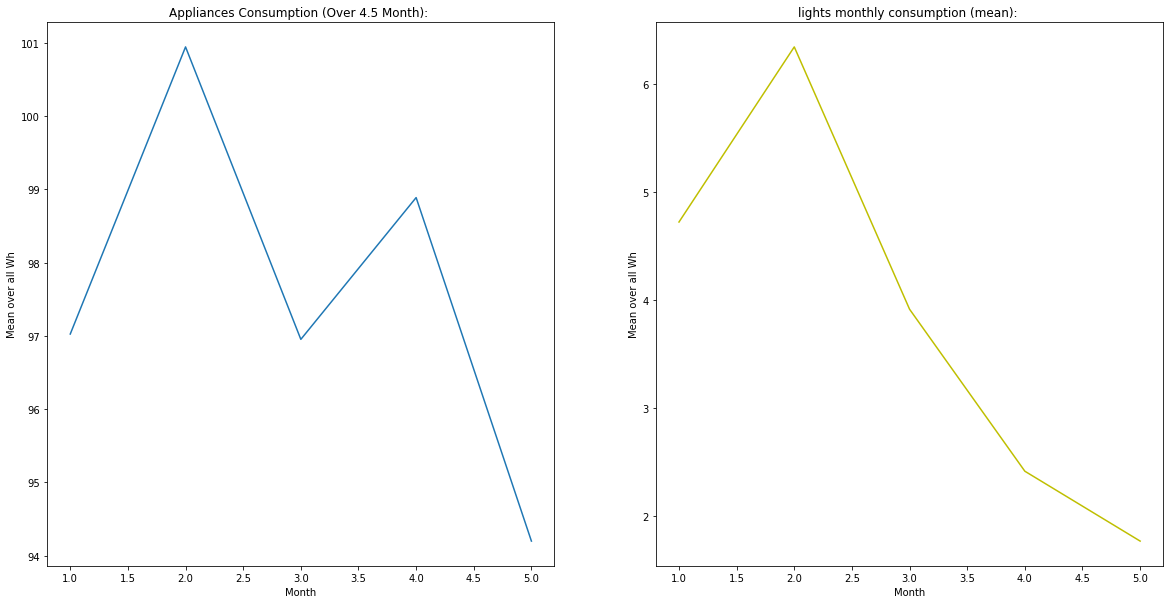

In [12]:
figure, axis = plt.subplots(1, 2, figsize=(20,10))

# Appliances Mean Consumption
month = appl_set['Appliances'].groupby(appl_set.index.month).mean().plot(ax=axis[0]) 
axis[0].title.set_text('Appliances Consumption (Over 4.5 Month): ')
axis[0].set_xlabel('Month')
axis[0].set_ylabel('Mean over all Wh')

# Lights Mean Consumption
month = lights_set['lights'].groupby(lights_set.index.month).mean().plot( c='y' , ax=axis[1]) 
axis[1].title.set_text('lights monthly consumption (mean): ')
axis[1].set_xlabel('Month')
axis[1].set_ylabel('Mean over all Wh')

plt.show()

# Hidden MARKOV MODEL

I create an array containing different number of states in order to create 2 models (one for Appliance and the other for light) each containing the various trained models with their number of states. 

I have used the GaussianHMM with these parameters: 

 - n_components= [2,3,4,7,10] , 
 - covariance_type='diag', 
 - min_covar=0.001, 
 - startprob_prior=1.0 
 - transmat_prior=1.0 
 - means_prior=0
 - means_weight=0
 - covars_prior=0.01
 - covars_weight=1
 - algorithm='viterbi'
 - random_state=None
 - n_iter=1000 
 - tol=0.01
 - verbose=False
 - params='stmc'
 - init_params='stmc'
 - implementation='log'


At the end I save in an array called "models" the triple (number of states used, model for Appliance, model for Light).


In [13]:
#number of hidden states
hidden_states=[2,3,4,7,10]

models=[]

for n_hs in hidden_states:

  hmm_appl = GaussianHMM(n_components=n_hs , n_iter=1000) 
  hmm_appl.fit(appl_set) 
  print(hmm_appl)

  hmm_lights = GaussianHMM(n_components=n_hs , n_iter=1000)
  hmm_lights.fit(lights_set)
  print(hmm_lights,"\n")

  models.append((n_hs,hmm_appl,hmm_lights))


GaussianHMM(n_components=2, n_iter=1000)
GaussianHMM(n_components=2, n_iter=1000) 

GaussianHMM(n_components=3, n_iter=1000)
GaussianHMM(n_components=3, n_iter=1000) 

GaussianHMM(n_components=4, n_iter=1000)
GaussianHMM(n_components=4, n_iter=1000) 

GaussianHMM(n_components=7, n_iter=1000)
GaussianHMM(n_components=7, n_iter=1000) 

GaussianHMM(n_components=10, n_iter=1000)


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:202: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)


GaussianHMM(n_components=10, n_iter=1000) 



#### I take the data for April and save it a new dataset for both appliance and light

In [14]:
data_app = appl_set['2016-04-01':'2016-05-01'] 
data_app.index = pd.to_datetime(data_app.index, format='%Y-%m-%d %H:%M:%S')

print(data_app)

                     Appliances
date                           
2016-04-01 00:00:00        60.0
2016-04-01 00:10:00        60.0
2016-04-01 00:20:00        60.0
2016-04-01 00:30:00        50.0
2016-04-01 00:40:00        50.0
...                         ...
2016-05-01 23:10:00        30.0
2016-05-01 23:20:00        50.0
2016-05-01 23:30:00        60.0
2016-05-01 23:40:00        60.0
2016-05-01 23:50:00        50.0

[4464 rows x 1 columns]


In [15]:
data_lig = lights_set['2016-04-01':'2016-05-01']
data_lig.index = pd.to_datetime(data_lig.index, format='%Y-%m-%d %H:%M:%S')

print(data_lig)

                     lights
date                       
2016-04-01 00:00:00     0.0
2016-04-01 00:10:00     0.0
2016-04-01 00:20:00     0.0
2016-04-01 00:30:00     0.0
2016-04-01 00:40:00     0.0
...                     ...
2016-05-01 23:10:00     0.0
2016-05-01 23:20:00     0.0
2016-05-01 23:30:00     0.0
2016-05-01 23:40:00     0.0
2016-05-01 23:50:00     0.0

[4464 rows x 1 columns]


## Perform Viterbi

Using Viterbi I'm going to find the most probable path that generates me a certain observation going to find the most probable hidden state in which you can find that certain observation

In [16]:
hs_predict = []

for model in models:
  n, hm_a, hm_l = model
  pred_a = hm_a.predict(data_app)
  pred_l = hm_l.predict(data_lig)
  hs_predict.append((n,pred_a,pred_l))


In [17]:
for predict_model in hs_predict:
  n, hidden_states_app, hidden_states_lig= predict_model

  print('Model:',n,'  Hidden states Appliance :', hidden_states_app)
  print('Model:',n,'  Hidden states Lights :', hidden_states_lig)
  print('\n')

Model: 2   Hidden states Appliance : [0 0 0 ... 0 0 0]
Model: 2   Hidden states Lights : [1 0 0 ... 0 0 0]


Model: 3   Hidden states Appliance : [0 0 0 ... 0 0 0]
Model: 3   Hidden states Lights : [1 0 0 ... 0 0 0]


Model: 4   Hidden states Appliance : [0 0 0 ... 0 0 0]
Model: 4   Hidden states Lights : [3 0 0 ... 0 0 0]


Model: 7   Hidden states Appliance : [0 0 0 ... 0 0 0]
Model: 7   Hidden states Lights : [3 1 1 ... 1 1 1]


Model: 10   Hidden states Appliance : [7 7 7 ... 7 7 7]
Model: 10   Hidden states Lights : [6 0 0 ... 0 0 0]




# Subsequence Graph

I look at the distribution of my examined subdataset

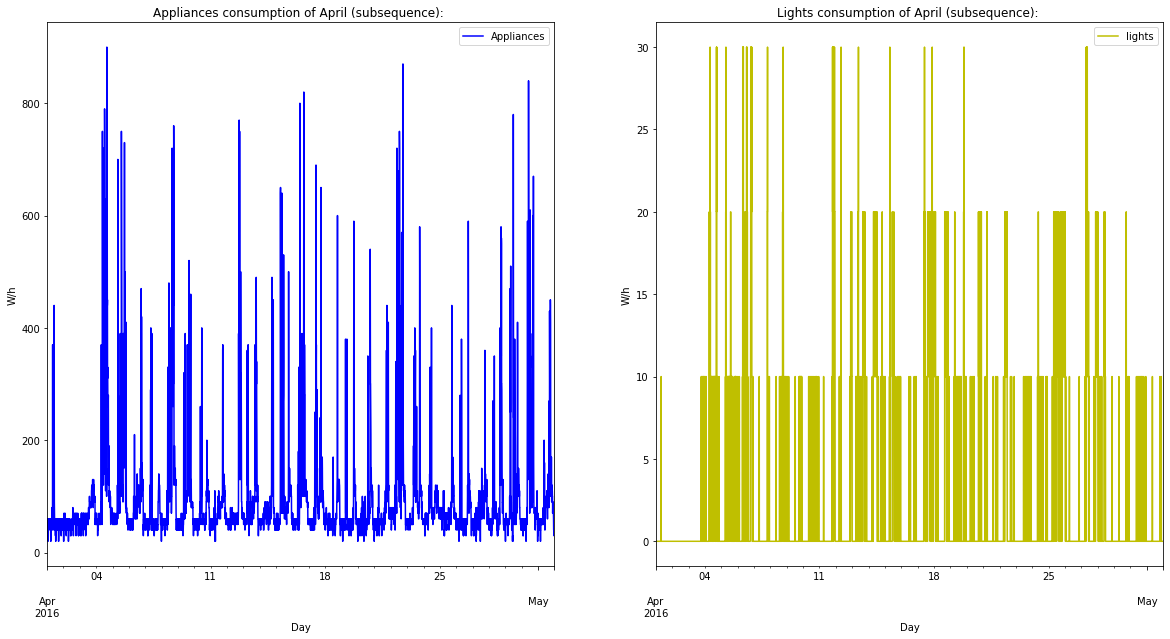

In [18]:
figure, axis = plt.subplots(1, 2, figsize=(20,10))

data_app.plot(c='b', ax=axis[0])
axis[0].title.set_text('Appliances consumption of April (subsequence): ')
axis[0].set_xlabel('Day')
axis[0].set_ylabel('W/h')

data_lig.plot(c='y' , ax=axis[1])
axis[1].title.set_text('Lights consumption of April (subsequence): ')
axis[1].set_xlabel('Day')
axis[1].set_ylabel('W/h')

plt.show()

## Viterbi Plot  

For each model found I'm going to visualize through a graph the distribution of points based on the association that they have with the hidden state of belonging in order to capture the various states of consumption

### Graph for model with 2 hidden states

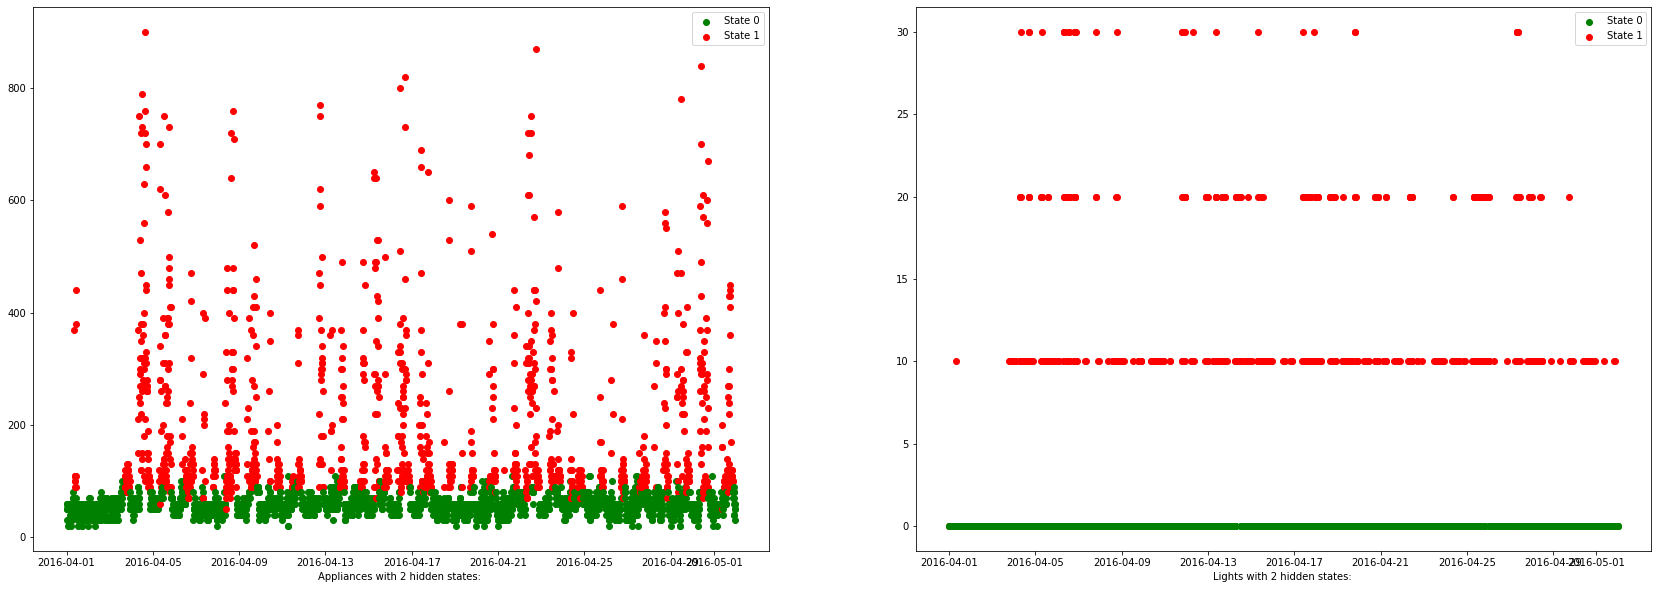

In [19]:
figure, axes = plt.subplots(1, 2, figsize=(29,10))

n, hidden_states_a, hidden_states_l = hs_predict[0]

# Appliance
axes[0].set_xlabel('Appliances with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_a)):
    if hidden_states_a[i] == 0:
        l1 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='g')
    else:
        l2 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='r')

axes[0].legend((l1, l2),
           ('State 0', 'State 1'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)

# Lights
axes[1].set_xlabel('Lights with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_l)):
  if hidden_states_l[i] == 0:
      l1 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='g', label='Low')
  else:
      l2 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='r', label='High')

axes[1].legend((l1, l2),
           ('State 0', 'State 1'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)


plt.show()

### Graph for model with 3 hidden states

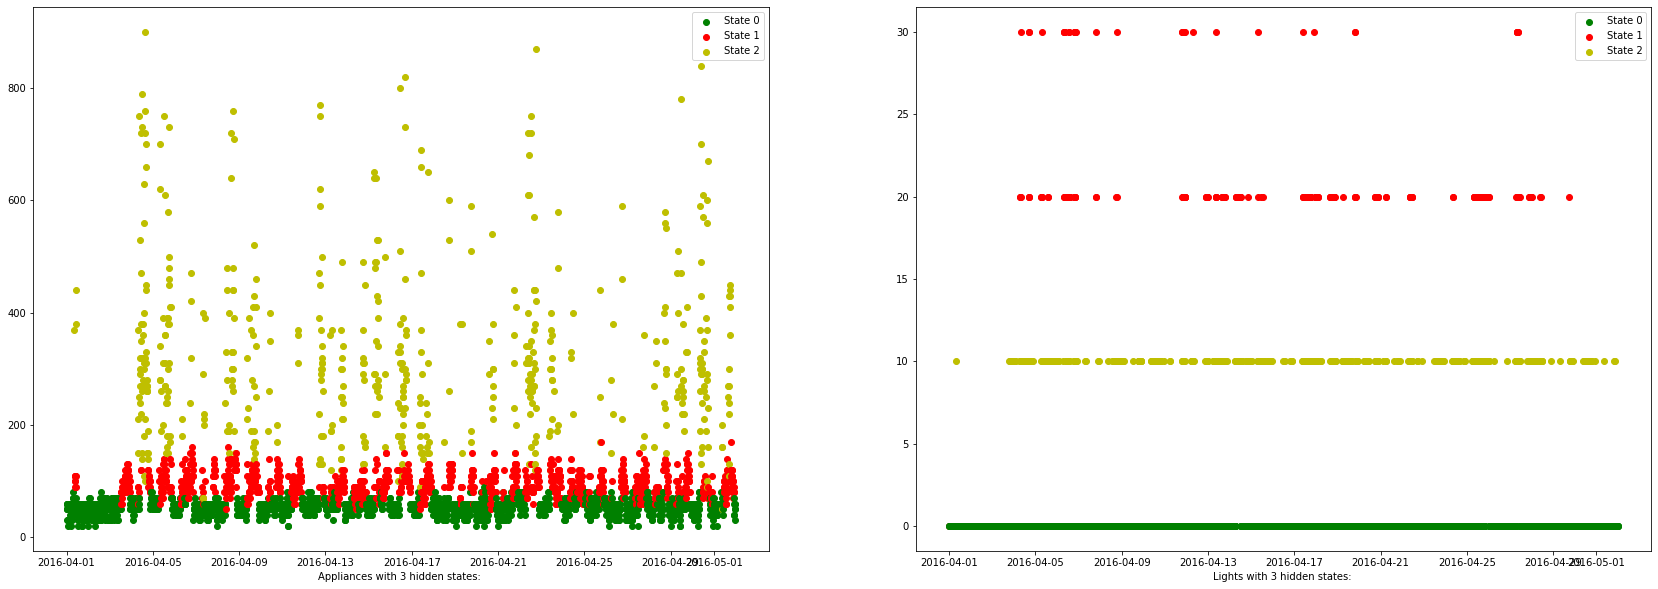

In [20]:
figure, axes = plt.subplots(1, 2, figsize=(29,10))

n, hidden_states_a, hidden_states_l = hs_predict[1]

# Appliance
axes[0].set_xlabel('Appliances with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_a)):
    if hidden_states_a[i] == 0:
        l1 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='g')
    if hidden_states_a[i] == 1:
        l2 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='r')
    if hidden_states_a[i] == 2:
        l3 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='y')

axes[0].legend((l1, l2, l3),
           ('State 0', 'State 1', 'State 2'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)

# Lights
axes[1].set_xlabel('Lights with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_l)):
    if hidden_states_l[i] == 0:
        l1 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='g')
    if hidden_states_l[i] == 1:
        l2 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='r')
    if hidden_states_l[i] == 2:
        l3 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='y')

axes[1].legend((l1, l2, l3),
           ('State 0', 'State 1', 'State 2'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)


plt.show()

### Graph for model with 4 hidden states

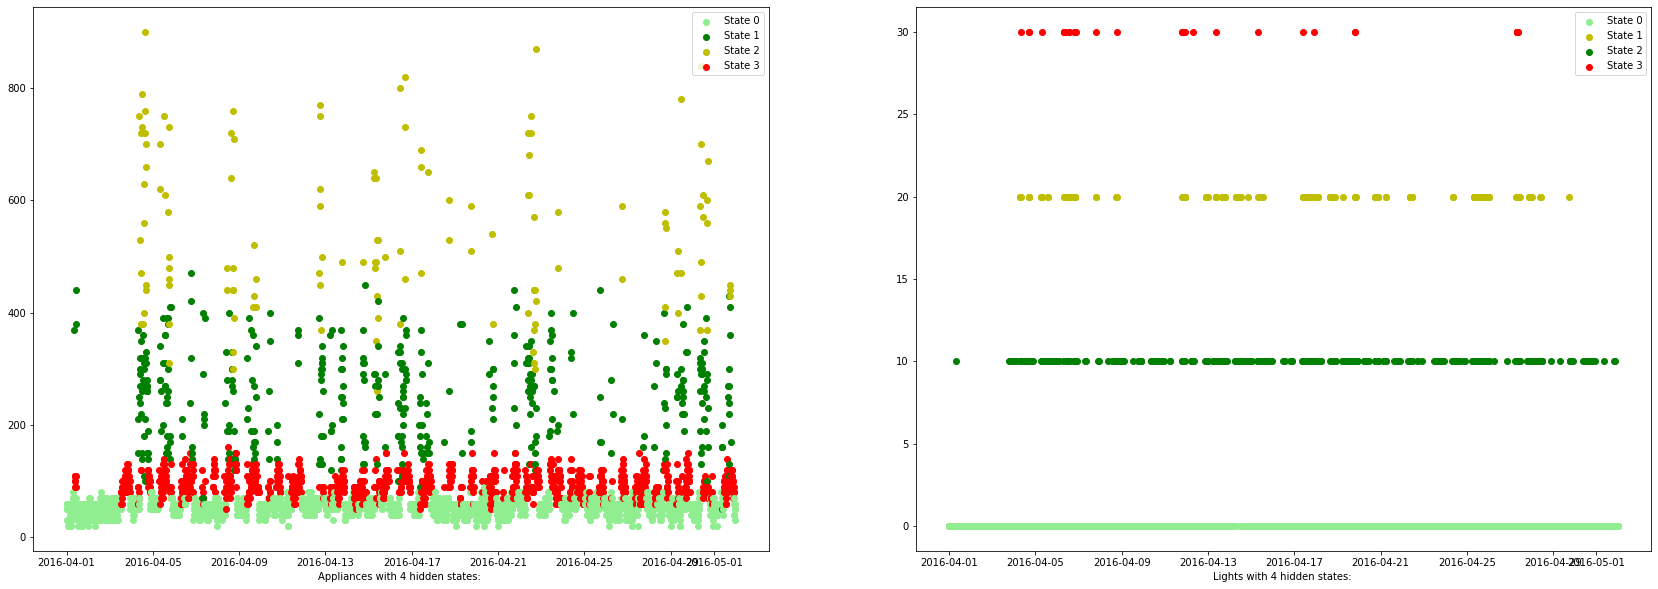

In [21]:
figure, axes = plt.subplots(1, 2, figsize=(29,10))

n, hidden_states_a, hidden_states_l = hs_predict[2]

# Appliance
axes[0].set_xlabel('Appliances with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_a)):
    if hidden_states_a[i] == 0:
        l1 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='lightgreen')
    if hidden_states_a[i] == 1:
        l2 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='g')
    if hidden_states_a[i] == 2:
        l3 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='y')
    if hidden_states_a[i] == 3:
        l4 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='r')

axes[0].legend((l1, l2, l3, l4),
           ('State 0', 'State 1', 'State 2','State 3'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)

# Lights
axes[1].set_xlabel('Lights with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_l)):
    if hidden_states_l[i] == 0:
        l1 =plt.scatter(data_lig.index[i], data_lig['lights'][i], c='lightgreen')
    if hidden_states_l[i] == 1:
        l2 = plt.scatter(data_lig.index[i], data_lig['lights'][i], c='y')
    if hidden_states_l[i] == 2:
        l3 = plt.scatter(data_lig.index[i], data_lig['lights'][i], c='g')
    if hidden_states_l[i] == 3:
        l4 = plt.scatter(data_lig.index[i], data_lig['lights'][i], c='r')

axes[1].legend((l1, l2, l3, l4),
           ('State 0', 'State 1', 'State 2', 'State 3'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)



plt.show()

### Graph for model with 7 hidden states

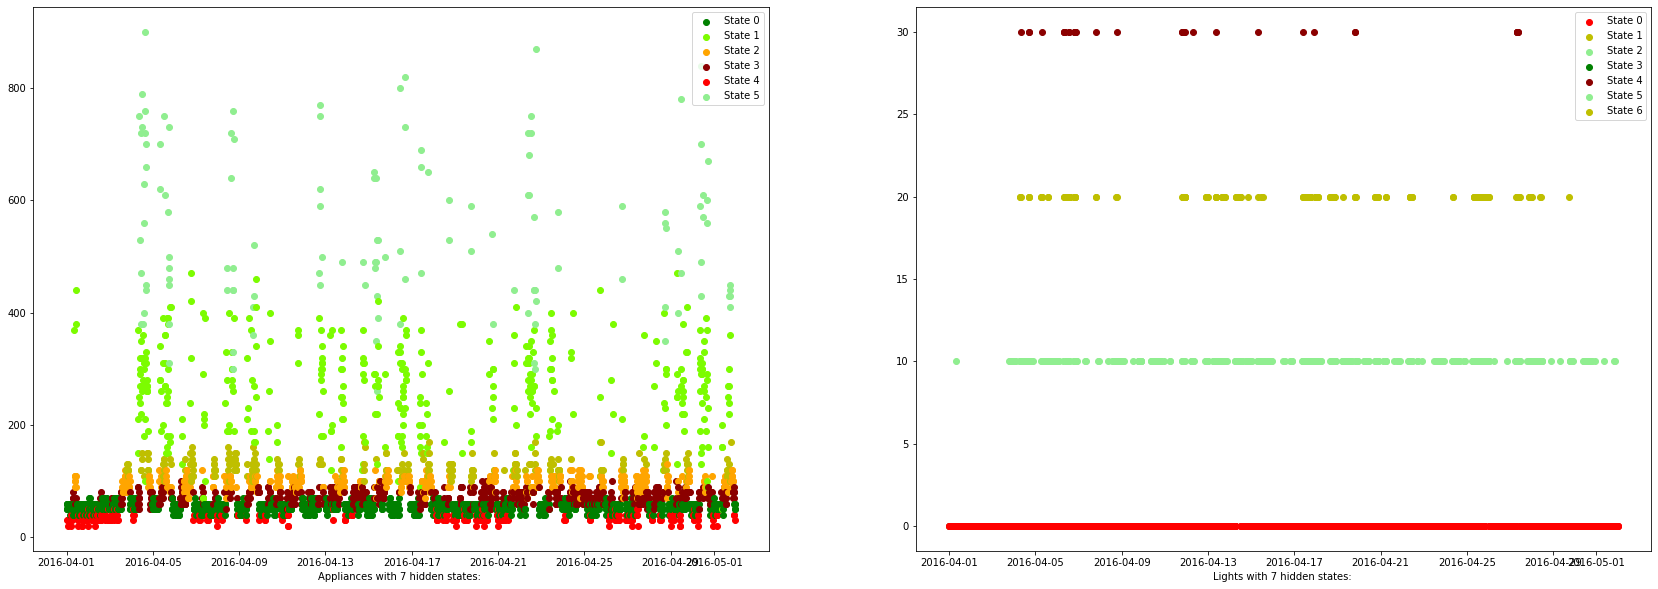

In [22]:
figure, axes = plt.subplots(1, 2, figsize=(29,10))

n, hidden_states_a, hidden_states_l = hs_predict[3]

# Appliance
axes[0].set_xlabel('Appliances with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_a)):
    if hidden_states_a[i] == 0:
        l1 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='g') 
    if hidden_states_a[i] == 1:
        l2 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='lawngreen') 
    if hidden_states_a[i] == 2:
        l3 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='orange') 
    if hidden_states_a[i] == 3:
        l4 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='darkred')  
    if hidden_states_a[i] == 4:
        l5 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='r') 
    if hidden_states_a[i] == 5:
        l6 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='lightgreen') 
    if hidden_states_a[i] == 6:
        l7 = axes[0].scatter(data_app.index[i], data_app['Appliances'][i], c='y') 

axes[0].legend((l1, l2, l3, l4, l5, l6),
           ('State 0', 'State 1', 'State 2', 'State 3', 'State 4', 'State 5', 'State 6'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)

# Lights
axes[1].set_xlabel('Lights with ' + str(n) + ' hidden states: ')

for i in range(len(hidden_states_l)):
    if hidden_states_l[i] == 1:
        l1 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='r')
    if hidden_states_l[i] == 2:
        l2 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='y')
    if hidden_states_l[i] == 0:
        l3 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='lightgreen')
    if hidden_states_l[i] == 3:
        l4 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='g')
    if hidden_states_l[i] == 4:
        l5 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='darkred')
    if hidden_states_l[i] == 5:
        l6 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='lawngreen')
    if hidden_states_l[i] == 6:
        l7 = axes[1].scatter(data_lig.index[i], data_lig['lights'][i], c='orange')

axes[1].legend((l1, l2, l3, l4, l5, l6, l7),
           ('State 0', 'State 1', 'State 2', 'State 3', 'State 4', 'State 5', 'State 6'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)

plt.show()

## Model Parameters

For each model I calculate through the score function the value of the Log likelihood associated both for Appliance and Lights. 

We can see how the value of log likelihood increases with the increase of hidden states.

In [23]:
for i in range(0,len(models)):
    n, hmm_appl, hmm_lights = models[i]

    print("--------------------------- MODEL: ",i," with ",n," Hidden States ----------------------------------")

    logProb = hmm_appl.score(appl_set)
    print('\n likelihood Appliances: ', round(logProb,2))

    logProb = hmm_lights.score(np.reshape(appl_set,[len(lights_set),1]))
    print('\n likelihood Lights: ', round(logProb,2))

--------------------------- MODEL:  0  with  2  Hidden States ----------------------------------

 likelihood Appliances:  -97986.85

 likelihood Lights:  -2836470.39
--------------------------- MODEL:  1  with  3  Hidden States ----------------------------------

 likelihood Appliances:  -91386.03

 likelihood Lights:  -4902247.18
--------------------------- MODEL:  2  with  4  Hidden States ----------------------------------

 likelihood Appliances:  -90890.64

 likelihood Lights:  -7857997.82
--------------------------- MODEL:  3  with  7  Hidden States ----------------------------------

 likelihood Appliances:  -87121.58

 likelihood Lights:  -384540.57
--------------------------- MODEL:  4  with  10  Hidden States ----------------------------------

 likelihood Appliances:  -86303.49

 likelihood Lights:  -672220.33


# Sampling

For each model I take 150 samples and print the associated graphs for both the feature matrix and the state sequence returned by the function

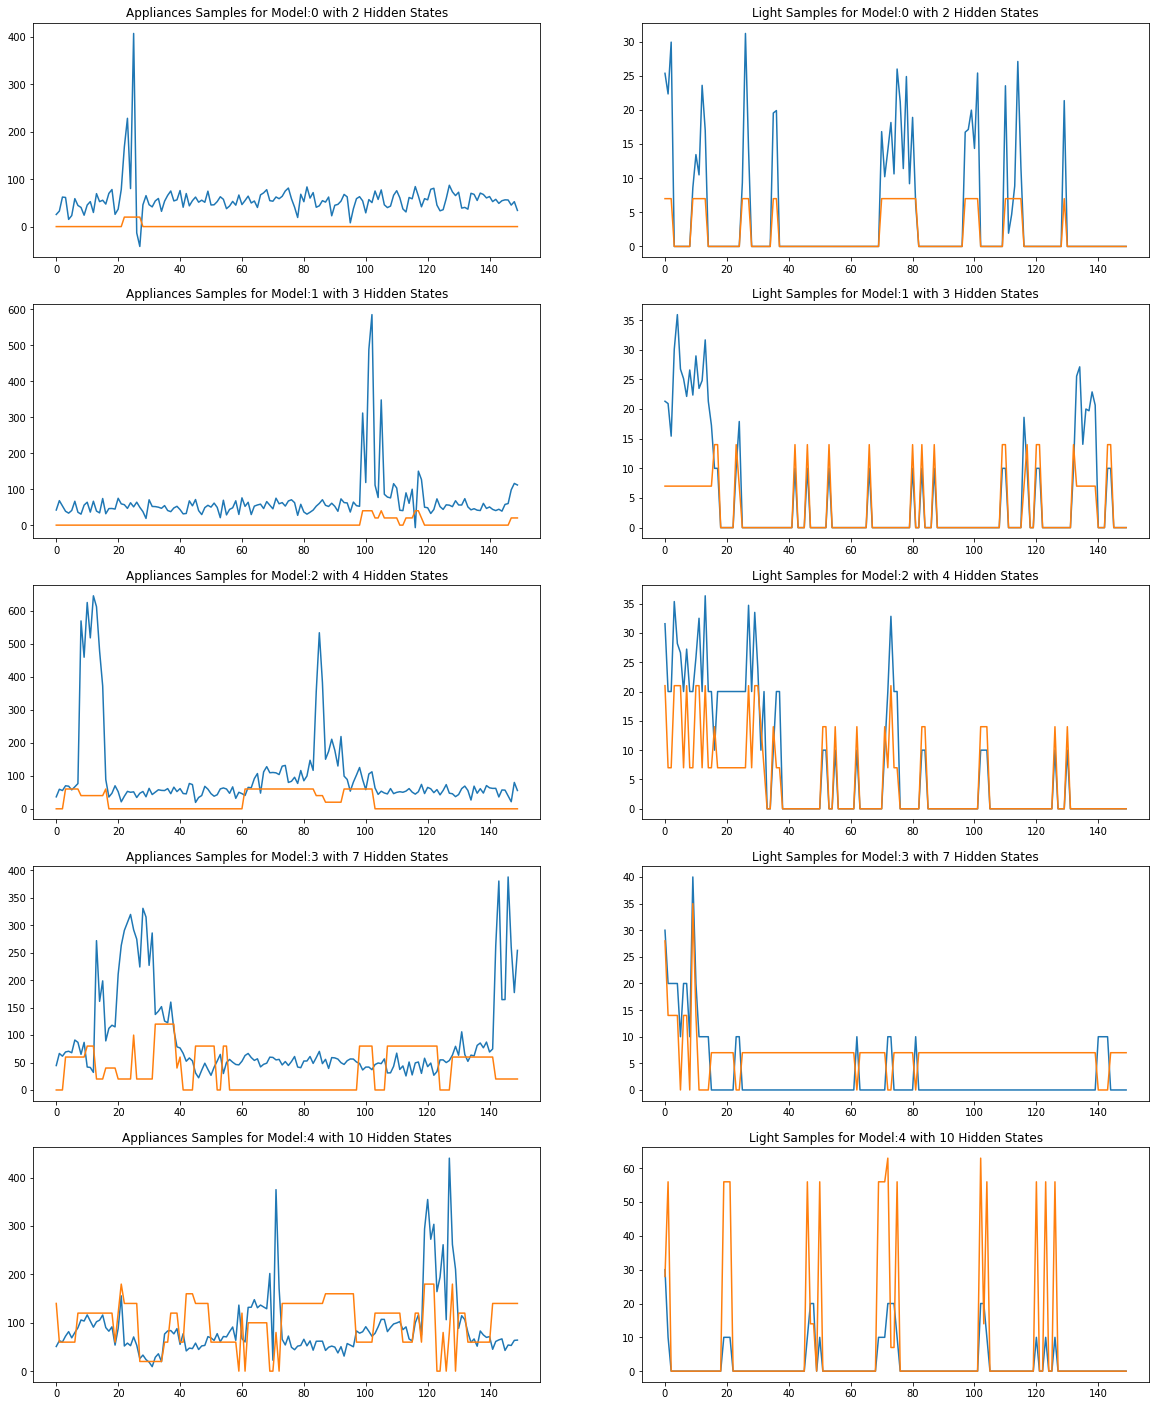

In [24]:
figure, axis = plt.subplots(5, 2, figsize=(20,25))

for i in range(0,len(models)):
  n, hmm_appl, hmm_lights = models[i]

  feature_matrix_a, state_sequence_a = hmm_appl.sample(n_samples=150)
  feature_matrix_l, state_sequence_l = hmm_lights.sample(n_samples=150)

  # For Appliance
  axis[i, 0].plot(feature_matrix_a)
  axis[i, 0].plot(state_sequence_a*20)
  axis[i, 0].title.set_text('Appliances Samples for Model:' + str(i) + ' with '+ str(n) +' Hidden States')
    
  # For Light
  axis[i, 1].plot(feature_matrix_l)
  axis[i, 1].plot(state_sequence_l*7)
  axis[i, 1].title.set_text('Light Samples for Model:' + str(i) + ' with '+ str(n) +' Hidden States')
  
# Combine all the operations and display
plt.show()

## Result



In the case of 2 hidden states, regardless of the type of model we can see that the hidden states of both can identify the parts of the sequences that vary enough, in fact when we have high peaks even the hidden states inferred by the problem vary. When the hidden state increase we have that the variation between a hidden state and another changes quite quickly showing extremely sensitive and adapting sometimes too much even to the smallest variations, this makes me conclude that more states we have, the more we can capture the variance in consumption. In summary for this type of problem having hidden state higher than 4 does not bring great benefits.

#### Density Graph

Now through the graph of the distribution we go to see like for every model the graphs go to detach from the original distribution

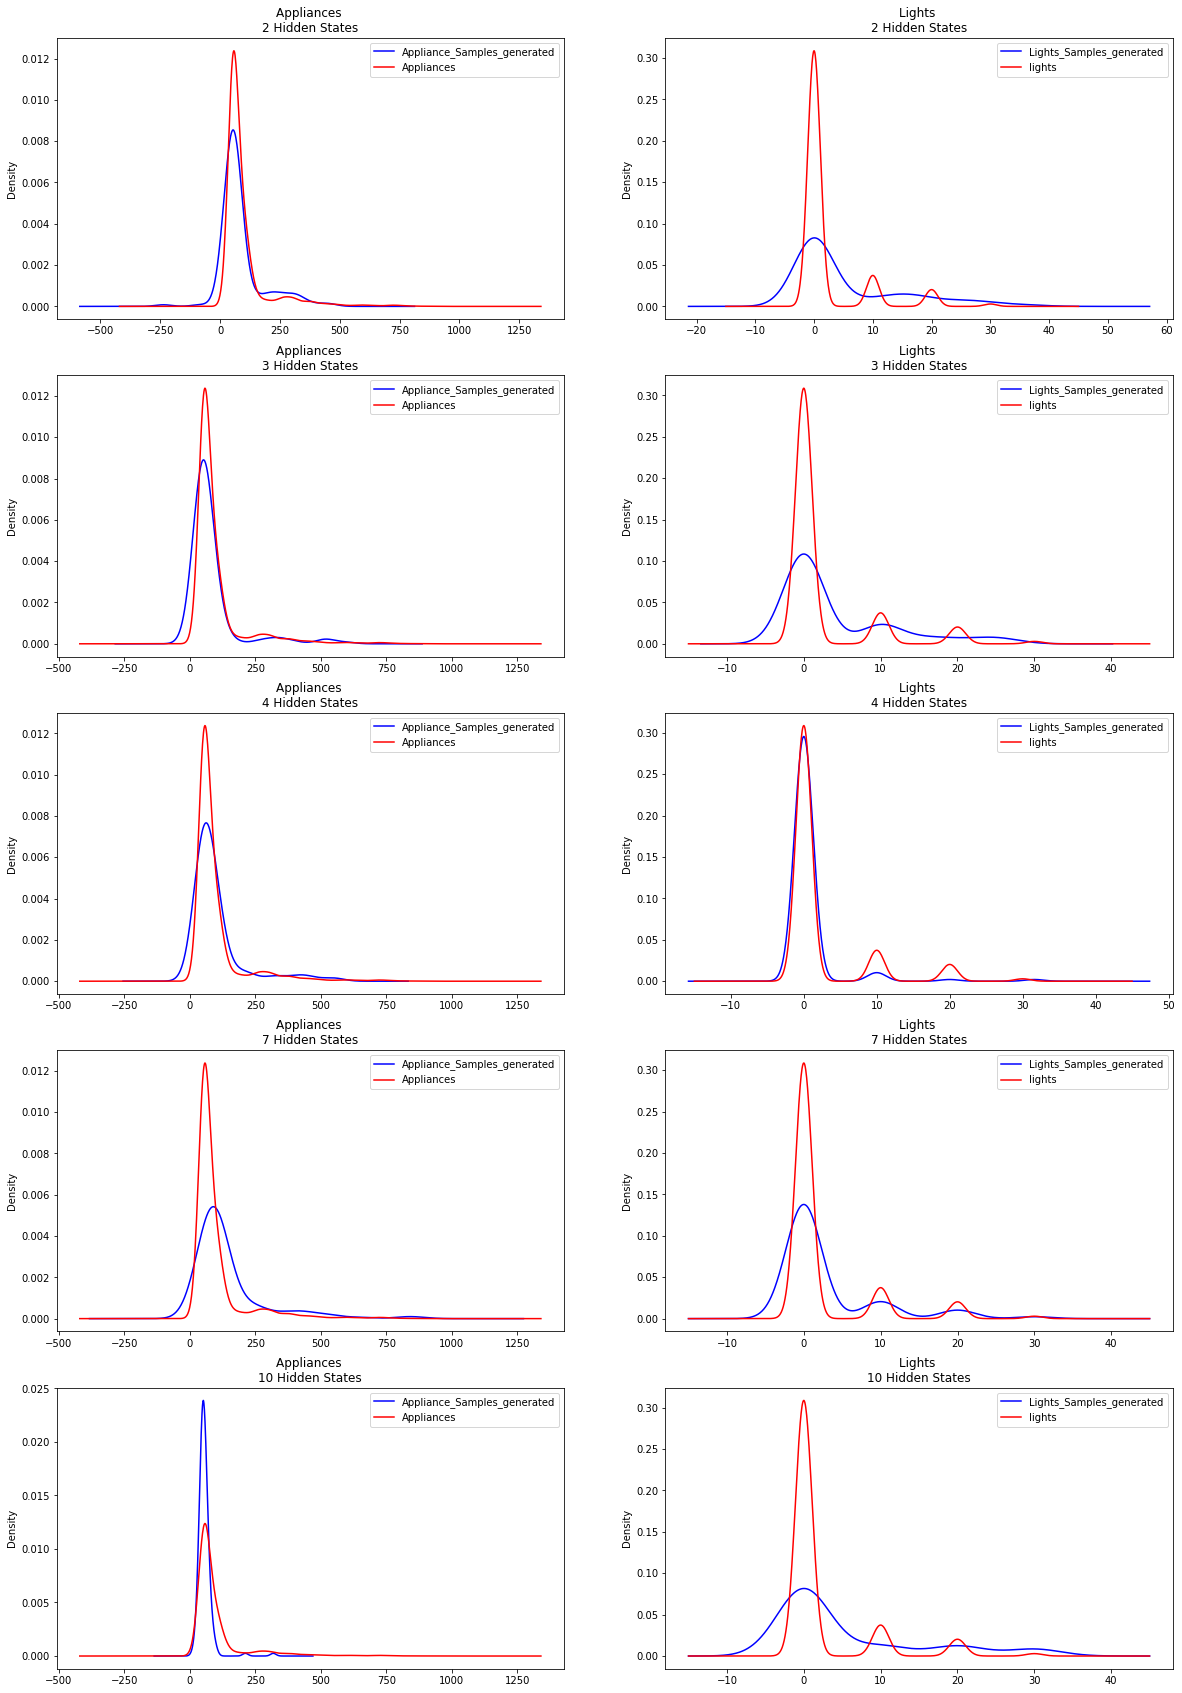

In [25]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 2, figsize=(20,30))

for i in range(0,len(models)):
  n, hmm_appl, hmm_lights = models[i]

  feature_matrix_a, state_sequence_a = hmm_appl.sample(n_samples=150)
  feature_matrix_l, state_sequence_l = hmm_lights.sample(n_samples=150)

  # For Appliance
  df1 = pd.DataFrame(feature_matrix_a, columns=['Appliance_Samples_generated'])
  df1.plot(c='b', kind='kde', ax=axis[i,0])
  axis[i,0].title.set_text('Appliances \n' + str(n) + ' Hidden States')
    
  # density
  data_app.plot(c='r', kind='kde', ax=axis[i,0])

# - - - - - - - - - - - - - - - - - -

  # For Lights
  df1 = pd.DataFrame(feature_matrix_l, columns=['Lights_Samples_generated'])
  df1.plot(c='b', kind='kde', ax=axis[i,1])
    
  # density
  data_lig.plot(c='r', kind='kde', ax=axis[i,1])
  axis[i,1].title.set_text('Lights \n' + str(n) + ' Hidden States')
  
# Combine all the operations and display
plt.show()

### Graph in more details

#### Appliance

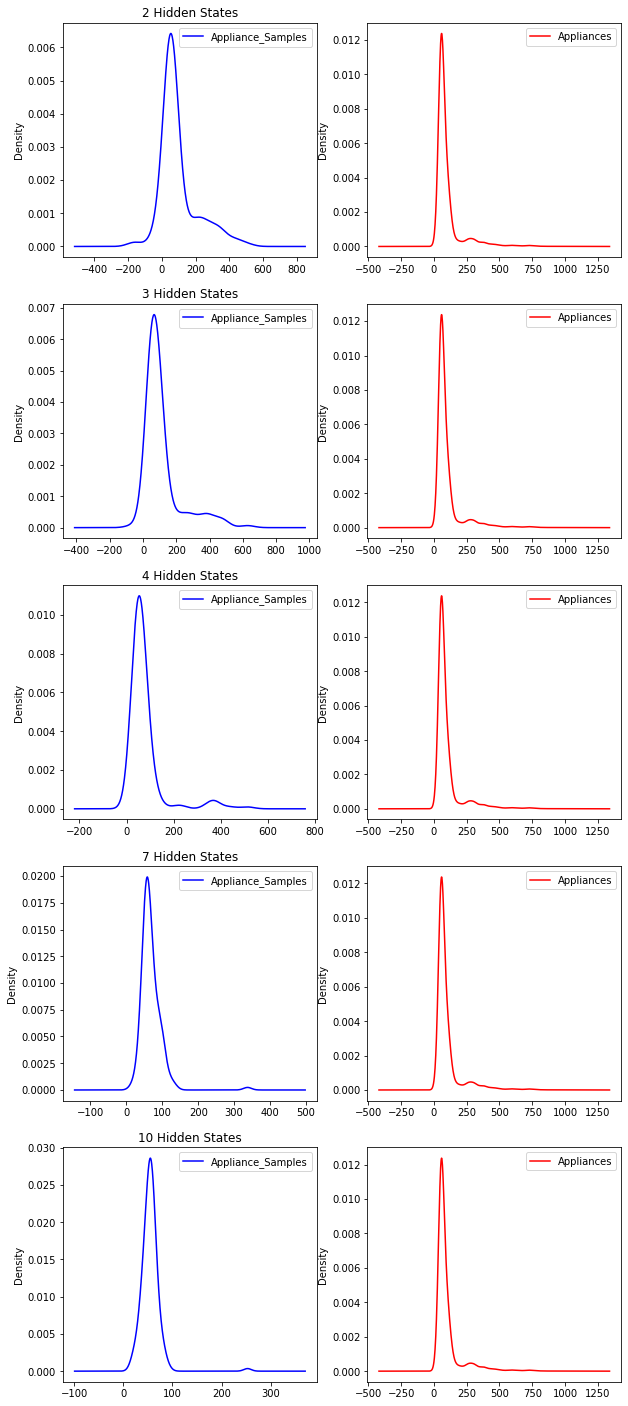

In [26]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 2, figsize=(10,25))

for i in range(0,len(models)):
  n, hmm_appl, hmm_lights = models[i]

  feature_matrix_a, state_sequence_a = hmm_appl.sample(n_samples=150)

  # For Appliance
  df1 = pd.DataFrame(feature_matrix_a, columns=['Appliance_Samples'])
  df1.plot(c='b', kind='kde', ax=axis[i,0])
  axis[i,0].title.set_text( str(n) + ' Hidden States')
    
  # For density
  data_app.plot(c='r', kind='kde', ax=axis[i,1])

  
# Combine all the operations and display
plt.show()

#### Lights

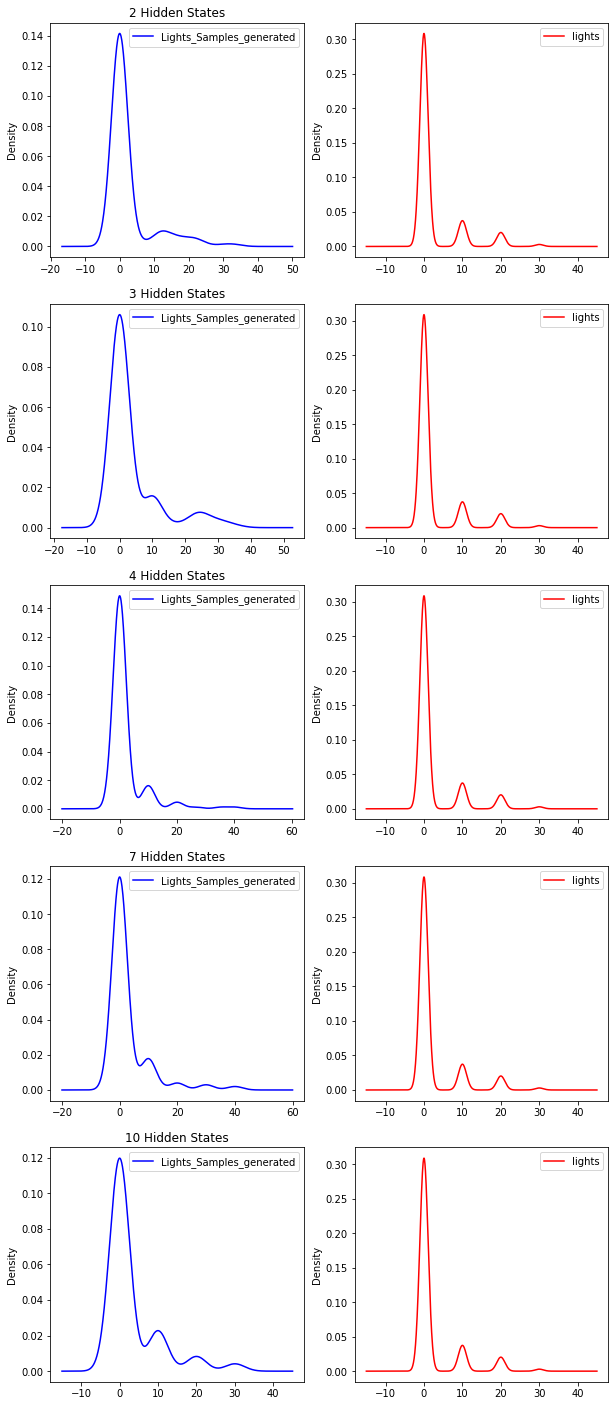

In [27]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 2, figsize=(10,25))

for i in range(0,len(models)):
  n, hmm_appl, hmm_lights = models[i]

  feature_matrix_l, state_sequence_l = hmm_lights.sample(n_samples=150)

  # For Lights
  df1 = pd.DataFrame(feature_matrix_l, columns=['Lights_Samples_generated'])
  df1.plot(c='b', kind='kde', ax=axis[i,0])
  axis[i,0].title.set_text( str(n) + ' Hidden States')
    
  # For density
  data_lig.plot(c='r', kind='kde', ax=axis[i,1])
  
# Combine all the operations and display
plt.show()

# Conclusion

In conclusion we can say that the distributions of the samples get closer and closer to the real distributions when the number of hidden states in the model increases, but up to 4, which is the best representative number of hidden states in the model for this data.

The graphs clearly show that with more of 7 hidden states the distribution diverges from the true distribution.

I think this was a very interesting Assignments and allowed me to understand in more detail the concepts seen previously in class in a more practical way.